In [1]:
import gymnasium as gym
import numpy as np
from collections import defaultdict

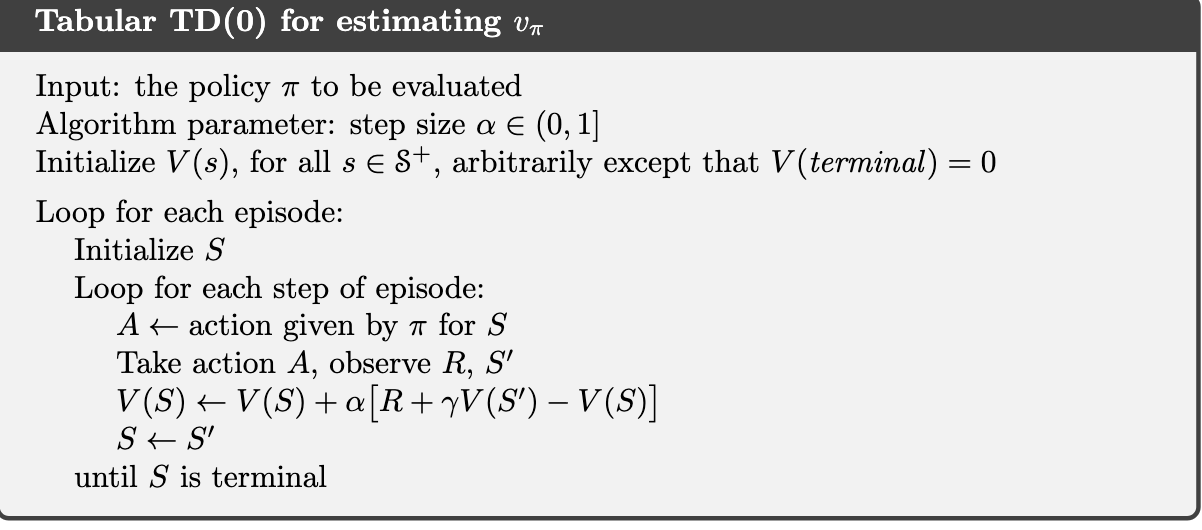

In [ ]:
def on_policy_TD_prediction(env, policy, step_size=0.5, discount_factor=1.0, episodes=10000, max_t=None):
    nS = env.observation_space.n
    nA = env.action_space.n
    V = np.zeros(nS)

    for i in range(episodes):
        state, _ = env.reset()
        steps = 0
        while(True):
            action = np.random.choice(nA, p=policy[state])
            s_next, reward, term, trun, _ = env.step(action)
            steps+=1
            V[state] += step_size*(reward + discount_factor*V[s_next]-V[state])
            state = s_next
            if term or trun:
                break
            if max_t is not None and steps >= max_t:
                break

    return V